**Topic Modeling with NMF and SVD**

In [1]:
#@ INSTALLING THE REQUIRED LIBRARIES AND DEPENDENCIES
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt 
from sklearn import decomposition
from sklearn.datasets import fetch_20newsgroups

%matplotlib inline
np.set_printoptions(suppress=True)

In [2]:
#@ LOOKING INTO THE DATASET
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
remove = ('headers', 'footers', 'quotes')
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=remove)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=remove)


In [3]:
#@ CHECKING THE SHAPE OF THE TRAIN DATASET
print('The shape of the train dataset is:', newsgroups_train.filenames.shape)
print('The shape of the train dataset is:', newsgroups_train.target.shape)

The shape of the train dataset is: (2034,)
The shape of the train dataset is: (2034,)


In [4]:
#@ CHECKING THE SHAPE OF THE TEST DATASET
print('The shape of the train dataset is:', newsgroups_test.filenames.shape)
print('The shape of the train dataset is:', newsgroups_test.target.shape)

The shape of the train dataset is: (1353,)
The shape of the train dataset is: (1353,)


In [5]:
#@ LOOKING TO SOME OF THE DATA
print("\n".join(newsgroups_train.data[:3]))

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych


Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corruption
for centuries.

 >In article <1993Apr19.020359.26996@sq.sq.com>, msb@sq.sq.c

In [6]:
np.array(newsgroups_train.target_names)[newsgroups_train.target[:3]]

array(['comp.graphics', 'talk.religion.misc', 'sci.space'], dtype='<U18')

In [7]:
newsgroups_train.target[:10]

array([1, 3, 2, 0, 2, 0, 2, 1, 2, 1])

In [8]:
num_topics, num_top_words = 6, 8

**Stop words removal, Stemming, Lemmatization**

In [9]:
#@ LIST ALL THE NAMES OF STOPWORDS 
from sklearn.feature_extraction import _stop_words
sorted(list(_stop_words.ENGLISH_STOP_WORDS))[:20]

['a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amoungst']

In [10]:
import nltk
# nltk.download('punkt')
from nltk import stem

[nltk_data] Downloading package punkt to /home/saugat/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
wordnet = stem.WordNetLemmatizer()
porter = stem.porter.PorterStemmer()

In [12]:
word_list = ['feet', 'foot', 'foots', 'footing']

In [13]:
[wordnet.lemmatize(word) for word in word_list]         # Applying WordNet Lemmatizer

['foot', 'foot', 'foot', 'footing']

In [14]:
[porter.stem(word) for word in word_list]              # Applying Porter Stemmer

['feet', 'foot', 'foot', 'foot']

**Data Processing**

In [15]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [16]:
vectorizer = CountVectorizer(stop_words='english')
vectors = vectorizer.fit_transform(newsgroups_train.data).todense()
vectors.shape

(2034, 26576)

In [17]:
print(len(newsgroups_train.data), vectors.shape)

2034 (2034, 26576)


In [18]:
vocab = np.array(vectorizer.get_feature_names_out())
vocab.shape

(26576,)

In [19]:
vocab[6000:6025]

array(['cleveland', 'clever', 'cleverer', 'cleverly', 'cli',
       'cliberbuiten', 'clibstatus', 'clibsucces', 'cliche', 'click',
       'clicking', 'clicks', 'client', 'clients', 'cliff', 'climate',
       'climatic', 'climatologist', 'climbed', 'clime', 'clincher',
       'cling', 'clinical', 'clinicaly', 'clinics'], dtype=object)

### Singular Value Decomposition (SVD)

The SVD algorithm factorizes a matrix into one matrix with orthogonal columns and one with orthogonal rows (along with a diagonal matrix, which contains the relative importance of each factor).

In [20]:
#@ Perform SVD on Vectors and Measure Execution Time
%time U, singular_values, Vh_conjugate_transpose = linalg.svd(vectors, full_matrices=False)

CPU times: user 2min 36s, sys: 1min 18s, total: 3min 55s
Wall time: 23.4 s


In [21]:
print(U.shape, singular_values.shape, Vh_conjugate_transpose.shape)

(2034, 2034) (2034,) (2034, 26576)


In [22]:
singular_values[:4]

array([433.92698542, 291.51012741, 240.71137677, 220.00048043])

In [23]:
np.diag(np.diag(singular_values[:4]))

array([433.92698542, 291.51012741, 240.71137677, 220.00048043])

In [24]:
num_top_words=8

def show_topics(a):
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = ([top_words(t) for t in a])
    return [' '.join(t) for t in topic_words]

In [25]:
show_topics(Vh_conjugate_transpose[:10])

['ditto critus propagandist surname galacticentric kindergarten surreal imaginative',
 'jpeg gif file color quality image jfif format',
 'graphics edu pub mail 128 3d ray ftp',
 'jesus god matthew people atheists atheism does graphics',
 'image data processing analysis software available tools display',
 'god atheists atheism religious believe religion argument true',
 'space nasa lunar mars probe moon missions probes',
 'image probe surface lunar mars probes moon orbit',
 'argument fallacy conclusion example true ad argumentum premises',
 'space larson image theory universe physical nasa material']

**NMF from sklearn**

In [26]:
m, n = vectors.shape
d = 5       # number of topics

In [27]:
clf = decomposition.NMF(n_components=d, random_state=1)
W1 = clf.fit_transform(np.asarray(vectors))
H1 = clf.components_

In [28]:
show_topics(H1)

['jpeg image gif file color images format quality',
 'edu graphics pub mail 128 ray ftp send',
 'space launch satellite nasa commercial satellites year market',
 'jesus god people matthew atheists does atheism said',
 'image data available software processing ftp edu analysis']

**TF-IDF**

It is a way to normalize term counts by taking into account how often they appear in documents, how long the document is and how common/rate the term is.

- TF = (# occurrences of term t in document) / (# of words in documents)
- IDF = log(# of documents / # documents with term t in it)

In [29]:
vectorizer_tfidf = TfidfVectorizer(stop_words='english')
vectors_tfidf = vectorizer_tfidf.fit_transform(newsgroups_train.data) # (documents, vocab)

In [32]:
newsgroups_train.data[10:20]

["a\n\nWhat about positional uncertainties in S-L 1993e?   I assume we know where\nand what Galileo is doing within a few meters.   But without the\nHGA,  don't we have to have some pretty good ideas, of where to look\nbefore imaging?  If the HGA was working,  they could slew around\nin near real time (Less speed of light delay).  But when they were\nimaging toutatis????  didn't someone have to get lucky on a guess to\nfind the first images?   \n\nAlso, I imagine S-L 1993e will be mostly a visual image.  so how will\nthat affect the other imaging missions.  with the LGA,  there is a real\ntight allocation of bandwidth.   It may be premature to hope for answers,\nbut I thought i'd throw it on the floor.",
 "I would like to program Tseng ET4000 to nonstandard 1024x768 mode by\nswitching to standard 1024x768 mode using BIOS and than changing some\ntiming details (0x3D4 registers 0x00-0x1F) but I don't know how to\nselect 36 MHz pixel clock I need. The BIOS function selects 40 MHz.\n\nIs t

In [33]:
W1 = clf.fit_transform(vectors_tfidf)
H1 = clf.components_

In [34]:
show_topics(H1)

['people don think just like objective say morality',
 'graphics thanks files image file program windows know',
 'space nasa launch shuttle orbit moon lunar earth',
 'ico bobbe tek beauchaine bronx manhattan sank queens',
 'god jesus bible believe christian atheism does belief']

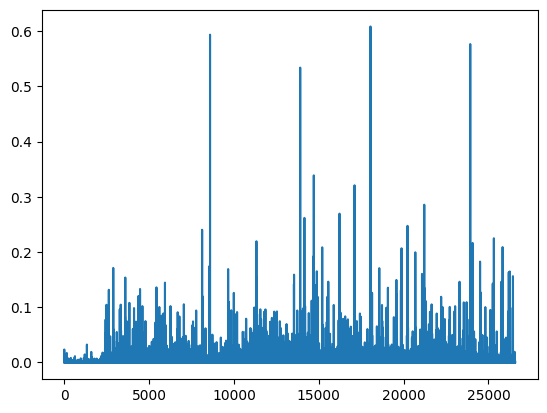

In [35]:
plt.plot(clf.components_[0])

In [36]:
clf.reconstruction_err_

43.71292606348688

**NMF in Summary**

Pros:
- Fast and Easy to use

Notes:
- For NMF, matrix needs to be at least as tall as it is wide, or we get an error with fit_transform
- Can use df_min in CountVectorizer to only look at words that were in at least k of the split texts